In [12]:
import numpy as np
import pandas as pd
import os
import seaborn as sb
import matplotlib.pyplot as plt

# Read CSV Files
### List of all CSV files

In [13]:
print('### All DataFrames ###')
for idx, file in enumerate(os.listdir('cleaned-dataframes')):
    print(idx, '-', file)

### All DataFrames ###
0 - customerData.csv
1 - leadData.csv
2 - orderData.csv
3 - productData.csv
4 - sellerData.csv


### Read to `DataFrames`

In [14]:
customerData = pd.read_csv('cleaned-dataframes/customerData.csv')
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_state      99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [15]:
productData = pd.read_csv('cleaned-dataframes/productData.csv')
productData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
 9   product_volume              32949 non-null  float64
 10  product_density             32949 non-null  float64
 11  product_items_sold          32951 non-null  int64  
 12  product_rating              32951 non-null  float64
 13  product_polarity            329

In [16]:
sellerData = pd.read_csv('cleaned-dataframes/sellerData.csv')
sellerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   seller_id          3095 non-null   object
 1   seller_state       3095 non-null   object
 2   seller_items_sold  3095 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 72.7+ KB


In [17]:
leadData = pd.read_csv('cleaned-dataframes/leadData.csv')
leadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seller_id               380 non-null    object 
 1   business_segment        380 non-null    object 
 2   lead_type               377 non-null    object 
 3   lead_behaviour_profile  289 non-null    object 
 4   business_type           377 non-null    object 
 5   days_to_first_sale      380 non-null    float64
 6   deal_days               380 non-null    float64
dtypes: float64(2), object(5)
memory usage: 20.9+ KB


In [18]:
orderData = pd.read_csv('cleaned-dataframes/orderData.csv')
orderData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118318 entries, 0 to 118317
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              118318 non-null  object 
 1   seller_id             118318 non-null  object 
 2   product_id            118318 non-null  object 
 3   customer_id           118318 non-null  object 
 4   review_id             118318 non-null  object 
 5   order_status          118318 non-null  object 
 6   price                 118318 non-null  float64
 7   payment_type          118315 non-null  object 
 8   payment_installments  118315 non-null  float64
 9   payment_time          118303 non-null  float64
 10  lead_time             115730 non-null  float64
 11  delivery_performance  115730 non-null  float64
 12  review_time           118318 non-null  int64  
 13  review_score          118318 non-null  int64  
 14  review_en             50668 non-null   object 
 15  

## Drop product rows without reviews comments

because those will skew our data

product_polarity is based on review comments (review_en row in orderData)

In [19]:
o = orderData.dropna(subset=["review_en"])
productData = productData.merge(o[["product_id"]], on="product_id")
productData.drop_duplicates(subset=["product_id"], inplace=True)
productData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19168 entries, 0 to 50667
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  19168 non-null  object 
 1   product_category_name       18816 non-null  object 
 2   product_name_length         18826 non-null  float64
 3   product_description_length  18826 non-null  float64
 4   product_photos_qty          18826 non-null  float64
 5   product_weight_g            19167 non-null  float64
 6   product_length_cm           19167 non-null  float64
 7   product_height_cm           19167 non-null  float64
 8   product_width_cm            19167 non-null  float64
 9   product_volume              19167 non-null  float64
 10  product_density             19167 non-null  float64
 11  product_items_sold          19168 non-null  int64  
 12  product_rating              19168 non-null  float64
 13  product_polarity            191

# Visualisation
## 0. product_polarity
uni-variate exploration of the response

In [20]:
productData["product_polarity"].describe()

count    19168.000000
mean         0.200699
std          0.302819
min         -1.000000
25%          0.000000
50%          0.125746
75%          0.343750
max          1.000000
Name: product_polarity, dtype: float64

<AxesSubplot:>

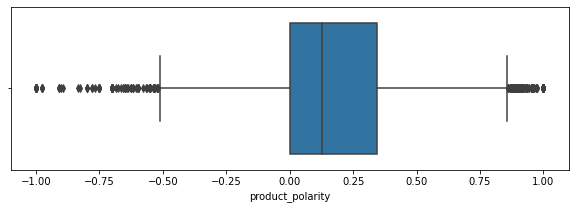

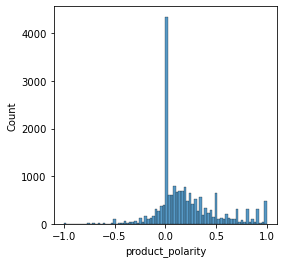

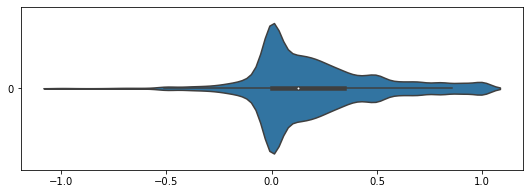

In [21]:
fig = plt.figure(figsize = (10,3))
sb.boxplot(x = "product_polarity", data = productData)

fig = plt.figure(figsize = (4,4))
sb.histplot(data=productData["product_polarity"])

fig = plt.figure(figsize = (9,3))
sb.violinplot(data=productData["product_polarity"], orient = 'h')

## 1. productData
product_polarity against variables in productData

In [22]:
productData.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume,product_density,product_items_sold,product_rating,product_polarity
count,18826.000000,18826.000000,18826.000000,19167.000000,19167.000000,19167.000000,19167.000000,19167.000000,19167.000000,19168.000000,19168.000000,19168.000000
mean,48.736003,772.208754,2.201636,2360.508948,30.960870,17.157823,23.363802,17024.645224,0.200957,5.092237,3.786580,0.200699
std,10.162180,638.411103,1.744878,4391.270938,16.948539,13.994300,12.121791,27845.465892,0.701802,14.296594,1.300228,0.302819
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,168.000000,0.000000,1.000000,1.000000,-1.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,2899.000000,0.066667,1.000000,3.000000,0.000000
50%,52.000000,595.000000,1.000000,717.000000,25.000000,14.000000,20.000000,7084.000000,0.118152,2.000000,4.000000,0.125746
75%,57.000000,975.000000,3.000000,2000.000000,39.000000,21.000000,30.000000,19200.000000,0.199726,5.000000,5.000000,0.343750
max,72.000000,3992.000000,19.000000,30000.000000,105.000000,105.000000,118.000000,294000.000000,45.880682,536.000000,5.000000,1.000000


<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

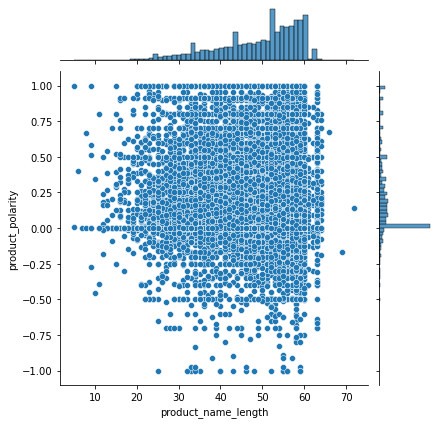

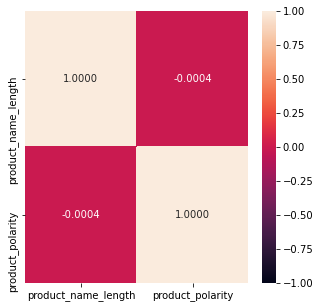

In [23]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = productData, x="product_name_length", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(productData[["product_name_length", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

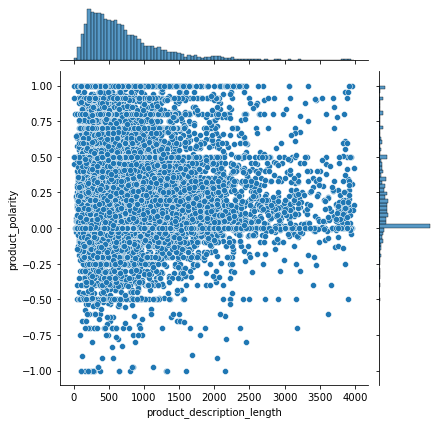

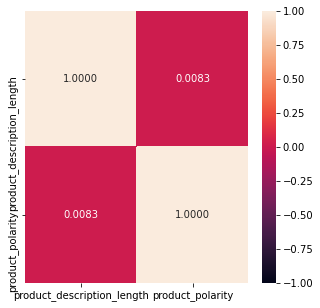

In [24]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = productData, x="product_description_length", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(productData[["product_description_length", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

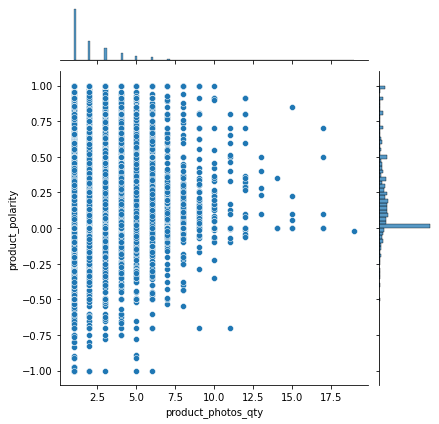

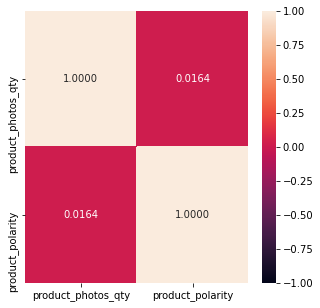

In [25]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = productData, x="product_photos_qty", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(productData[["product_photos_qty", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

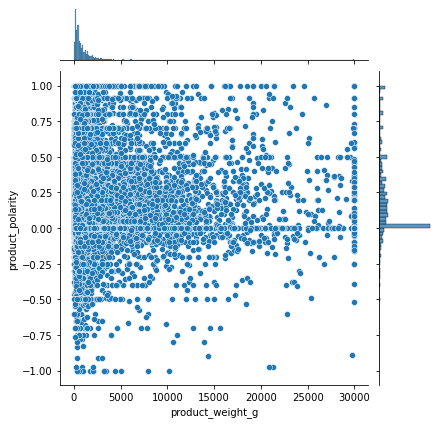

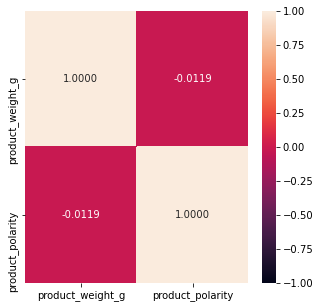

In [26]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = productData, x="product_weight_g", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(productData[["product_weight_g", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

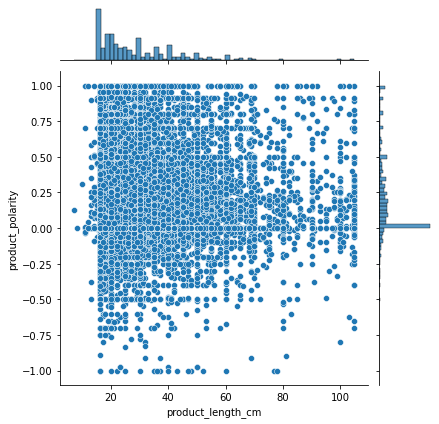

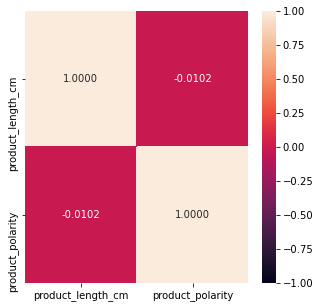

In [27]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = productData, x="product_length_cm", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(productData[["product_length_cm", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

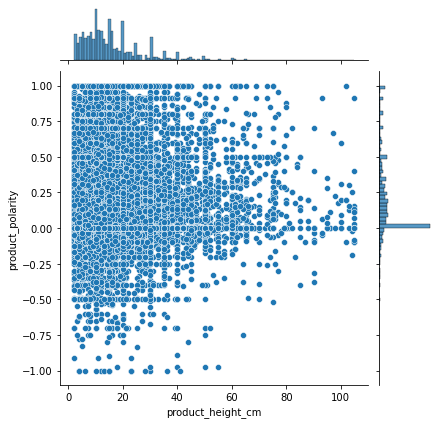

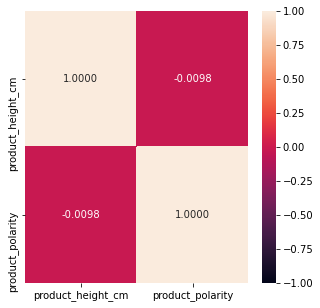

In [28]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = productData, x="product_height_cm", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(productData[["product_height_cm", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

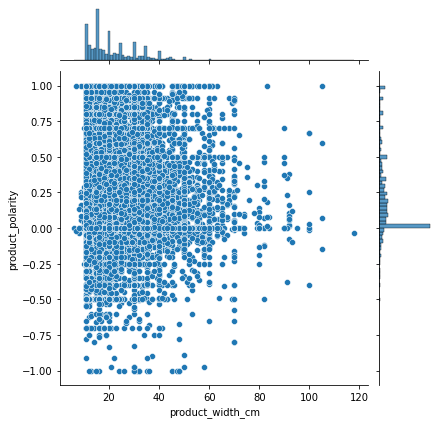

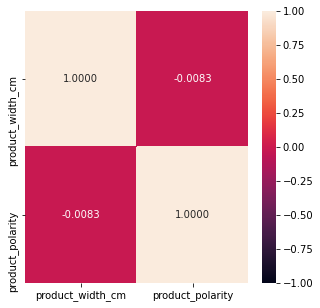

In [29]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = productData, x="product_width_cm", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(productData[["product_width_cm", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

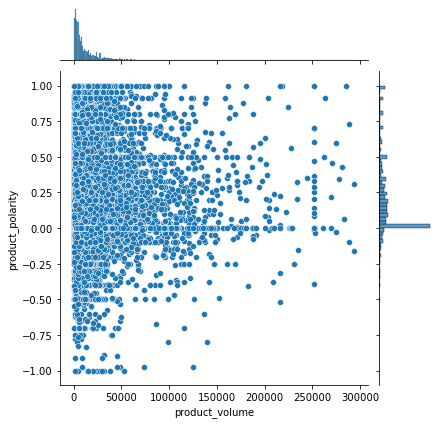

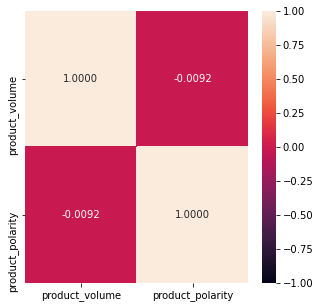

In [30]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = productData, x="product_volume", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(productData[["product_volume", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

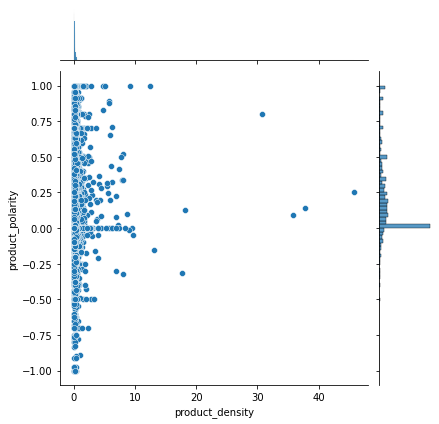

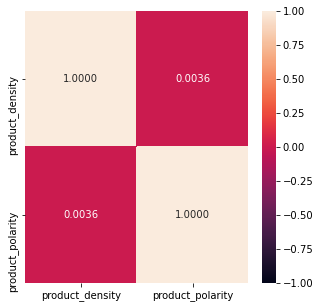

In [31]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = productData, x="product_density", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(productData[["product_density", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

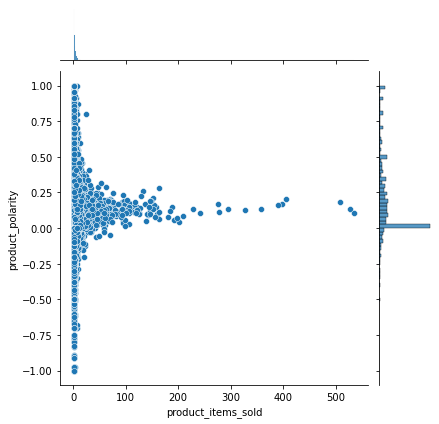

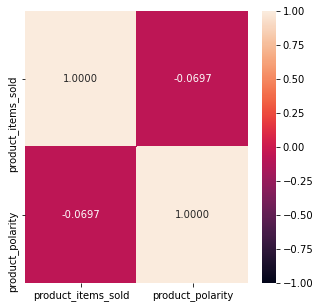

In [32]:
# against response 2: product_items_sold
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = productData, x="product_items_sold", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(productData[["product_items_sold", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

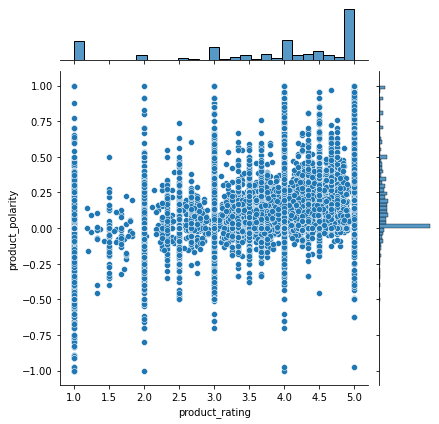

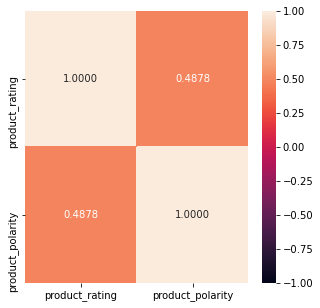

In [33]:
# against response 3: product_rating
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = productData, x="product_rating", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(productData[["product_rating", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

Interestingly, product_rating and product_polarity have a pretty good correlation.

<AxesSubplot:xlabel='product_polarity', ylabel='product_category_name'>

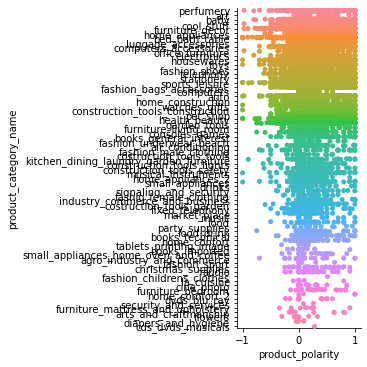

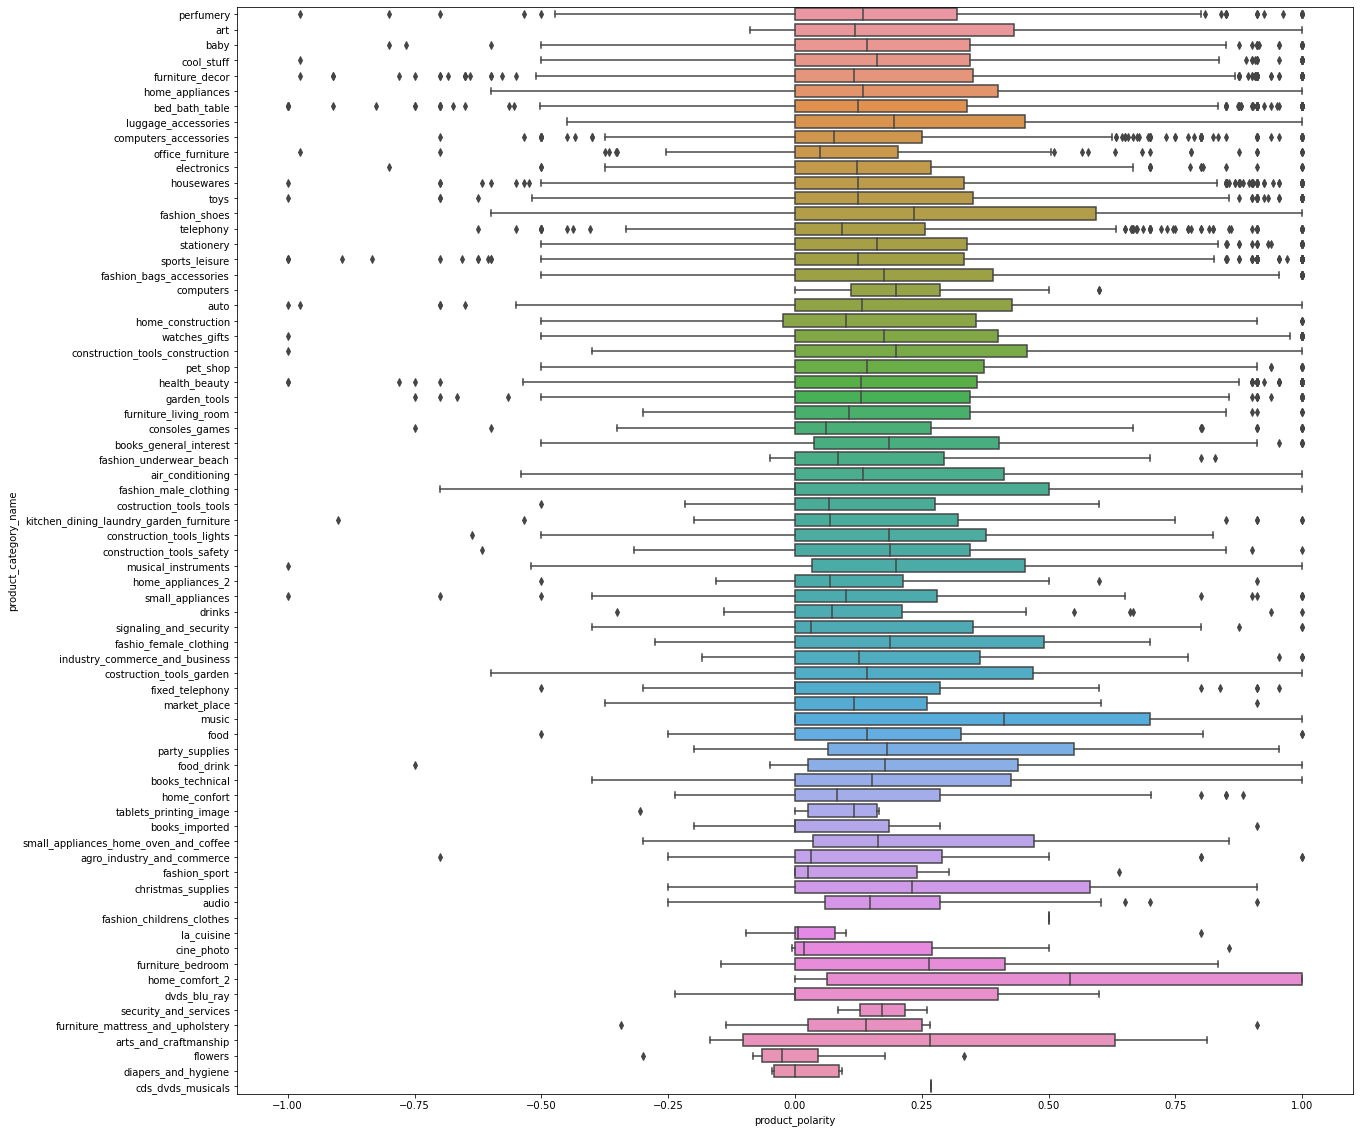

In [34]:
sb.catplot(data = productData, x="product_polarity", y="product_category_name")

fig = plt.figure(figsize = (20,20))
sb.boxplot(x = "product_polarity", y= "product_category_name", data = productData)

## 2. orderData
product_rating against variables in orderData

In [39]:
# merging
po = orderData.merge(productData[["product_id", "product_polarity"]], on="product_id")
po.drop(columns=["review_score", "review_en", "polarity"], inplace=True) # we don't need to visualise against these columns
po.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97608 entries, 0 to 97607
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              97608 non-null  object 
 1   seller_id             97608 non-null  object 
 2   product_id            97608 non-null  object 
 3   customer_id           97608 non-null  object 
 4   review_id             97608 non-null  object 
 5   order_status          97608 non-null  object 
 6   price                 97608 non-null  float64
 7   payment_type          97605 non-null  object 
 8   payment_installments  97605 non-null  float64
 9   payment_time          97597 non-null  float64
 10  lead_time             95412 non-null  float64
 11  delivery_performance  95412 non-null  float64
 12  review_time           97608 non-null  int64  
 13  product_polarity      97608 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 11.2+ MB


In [40]:
po.describe()

,price,payment_installments,payment_time,lead_time,delivery_performance,review_time,product_polarity
count,97608.000000,97605.000000,97597.000000,95412.000000,95412.000000,97608.000000,97608.000000
mean,118.052170,2.944070,0.274773,12.283560,10.923490,2.543183,0.141439
std,172.989129,2.768228,0.826701,9.724928,10.348254,9.098568,0.177862
min,0.850000,0.000000,0.000000,0.000000,-189.000000,0.000000,-1.000000
25%,39.990000,1.000000,0.000000,6.000000,6.000000,1.000000,0.044774
50%,75.000000,2.000000,0.000000,10.000000,12.000000,1.000000,0.119916
75%,129.990000,4.000000,0.000000,15.000000,16.000000,3.000000,0.192241
max,6735.000000,24.000000,60.000000,209.000000,146.000000,518.000000,1.000000


<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

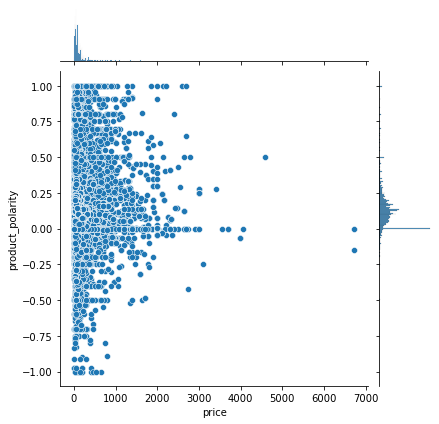

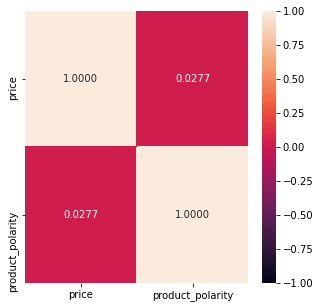

In [41]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = po, x="price", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(po[["price", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

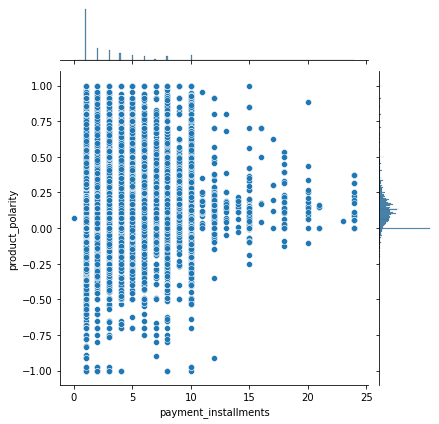

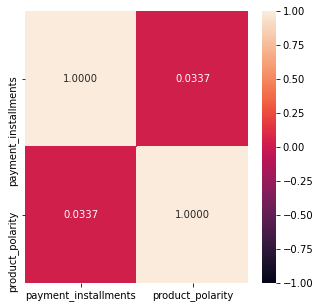

In [42]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = po, x="payment_installments", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(po[["payment_installments", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

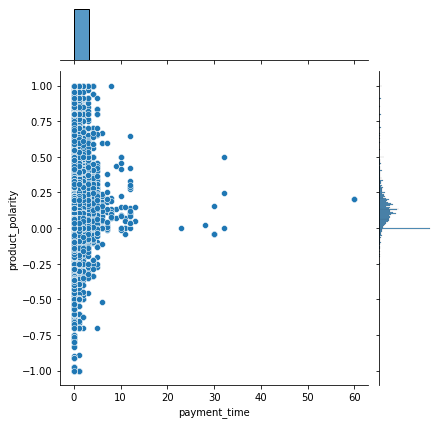

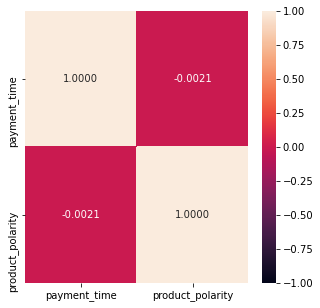

In [43]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = po, x="payment_time", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(po[["payment_time", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

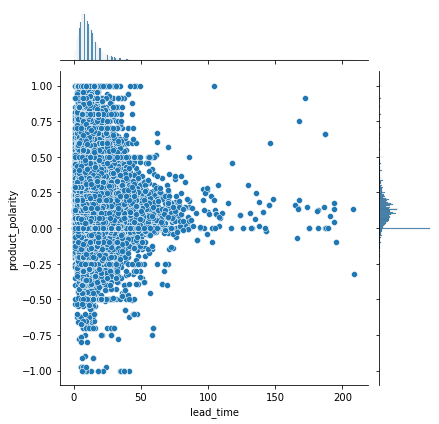

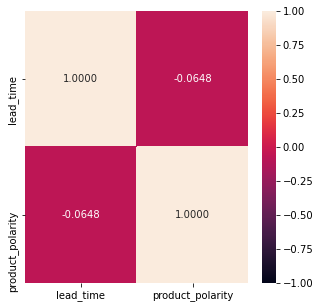

In [44]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = po, x="lead_time", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(po[["lead_time", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

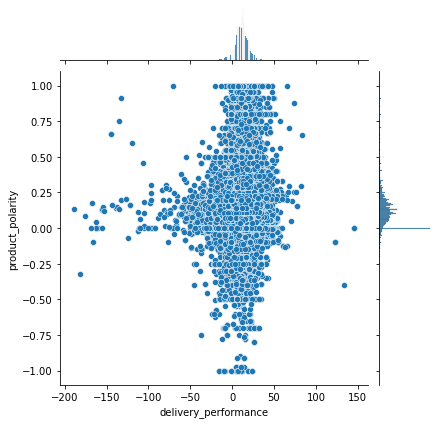

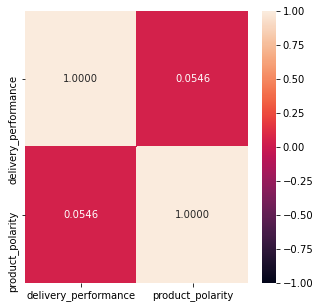

In [45]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = po, x="delivery_performance", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(po[["delivery_performance", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

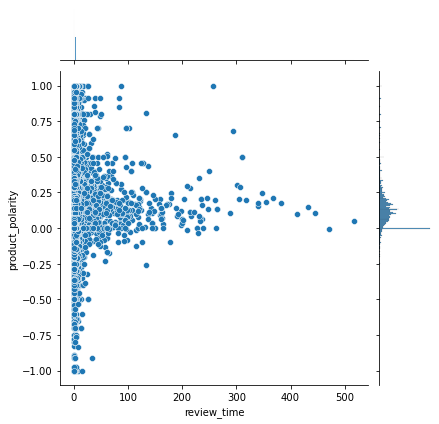

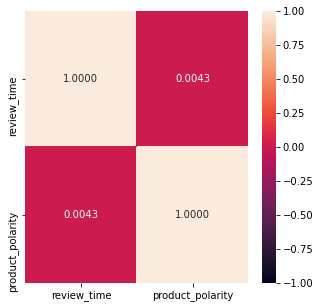

In [46]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = po, x="review_time", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(po[["review_time", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:xlabel='product_polarity', ylabel='order_status'>

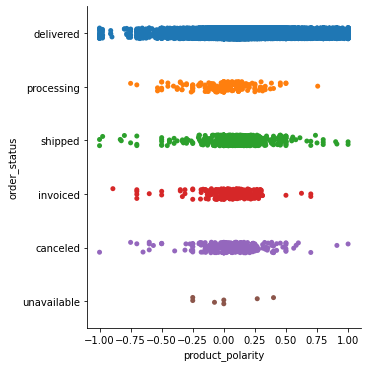

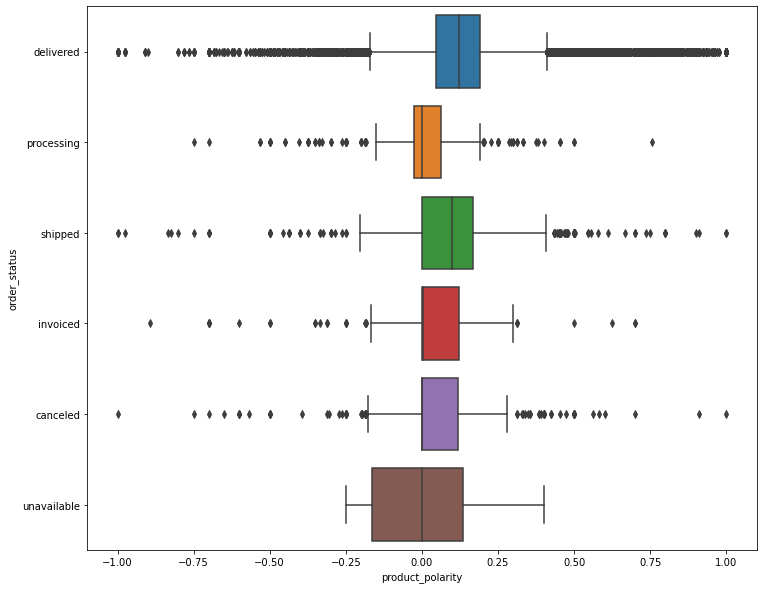

In [47]:
sb.catplot(data = po, x="product_polarity", y="order_status")

fig = plt.figure(figsize = (12,10))
sb.boxplot(x = "product_polarity", y= "order_status", data = po)

<AxesSubplot:xlabel='product_polarity', ylabel='payment_type'>

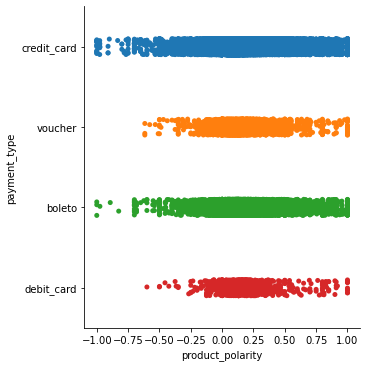

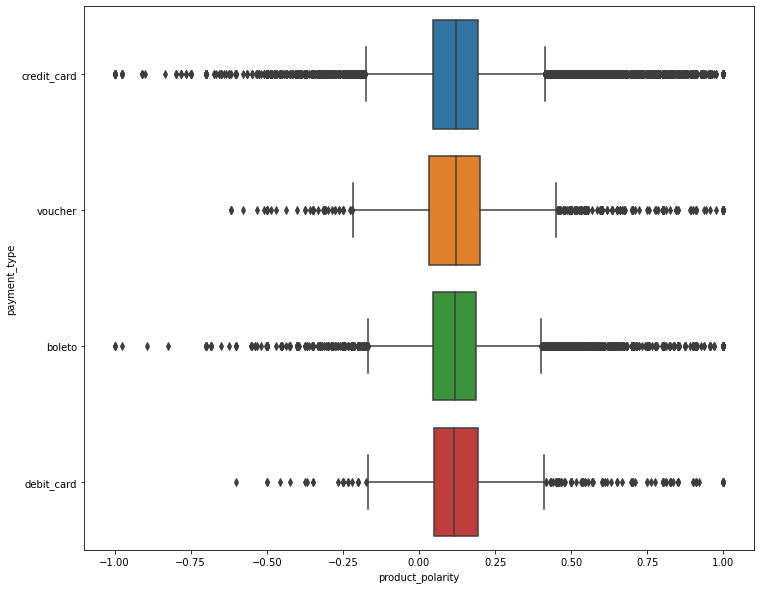

In [48]:
sb.catplot(data = po, x="product_polarity", y="payment_type")

fig = plt.figure(figsize = (12,10))
sb.boxplot(x = "product_polarity", y= "payment_type", data = po)

## 3. customerData
product_polarity against variables in customerData

In [49]:
# merging
pc = customerData.merge(po[["product_id", "customer_id", "product_polarity"]], on="customer_id")
pc.drop_duplicates(subset=["product_id", "customer_id"], inplace=True) # we do not want duplicates where the same customer buys multiple items of the same product
pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84644 entries, 0 to 97607
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         84644 non-null  object 
 1   customer_unique_id  84644 non-null  object 
 2   customer_state      84644 non-null  object 
 3   product_id          84644 non-null  object 
 4   product_polarity    84644 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.9+ MB


<AxesSubplot:xlabel='product_polarity', ylabel='customer_state'>

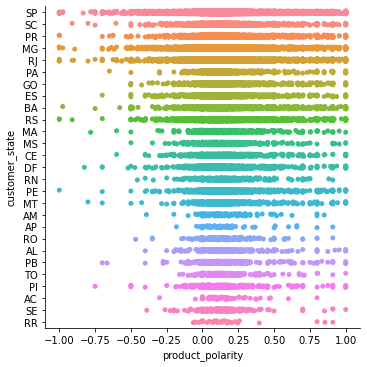

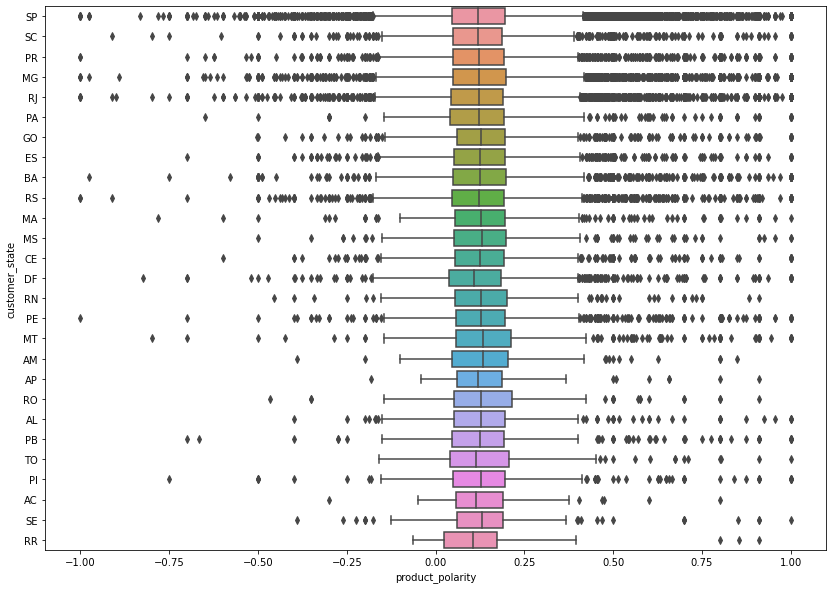

In [50]:
sb.catplot(data = pc, x="product_polarity", y="customer_state")

fig = plt.figure(figsize = (14,10))
sb.boxplot(x = "product_polarity", y= "customer_state", data = pc)

## 4. sellerData
product_polarity against variables in sellerData

In [51]:
# merging
ps = sellerData.merge(po[["product_id", "seller_id", "product_polarity"]], on="seller_id")
ps.drop_duplicates(subset=["product_id"], inplace=True) # we do not want duplicates of the same products 
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19168 entries, 0 to 97597
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seller_id          19168 non-null  object 
 1   seller_state       19168 non-null  object 
 2   seller_items_sold  19168 non-null  int64  
 3   product_id         19168 non-null  object 
 4   product_polarity   19168 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 898.5+ KB


<AxesSubplot:xlabel='product_polarity', ylabel='seller_state'>

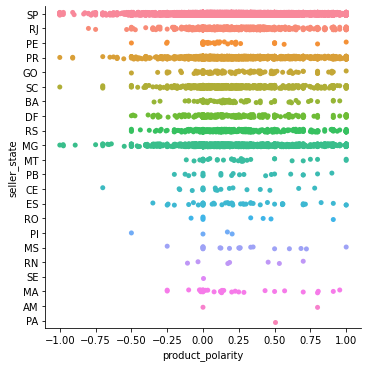

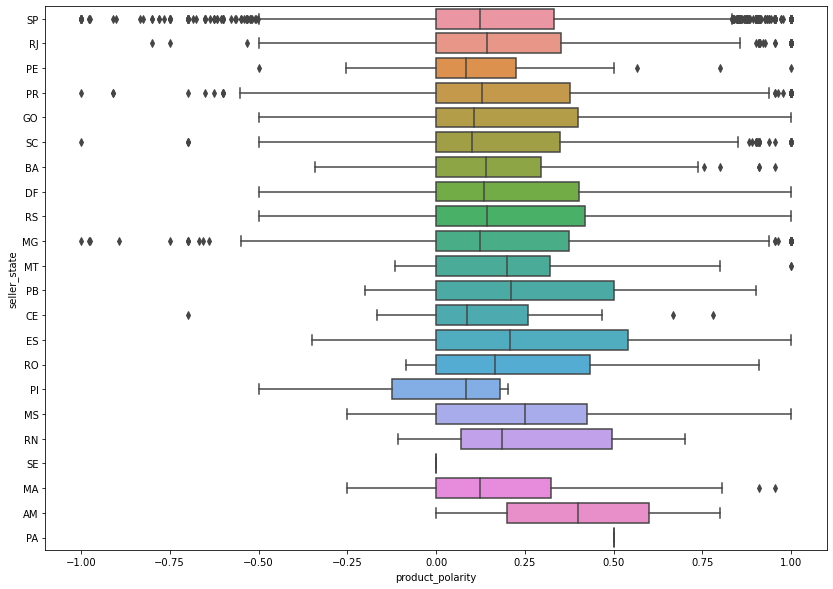

In [52]:
sb.catplot(data = ps, x="product_polarity", y="seller_state")

fig = plt.figure(figsize = (14,10))
sb.boxplot(x = "product_polarity", y= "seller_state", data = ps)

## 5. leadData
product_polarity against variables in leadData

In [53]:
# merging
pl = leadData.merge(po[["product_id", "seller_id", "product_polarity"]], on="seller_id")
pl.drop_duplicates(subset=["product_id"], inplace=True) # we do not want duplicates of the same products 
pl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136 entries, 0 to 3845
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seller_id               1136 non-null   object 
 1   business_segment        1136 non-null   object 
 2   lead_type               1127 non-null   object 
 3   lead_behaviour_profile  822 non-null    object 
 4   business_type           1132 non-null   object 
 5   days_to_first_sale      1136 non-null   float64
 6   deal_days               1136 non-null   float64
 7   product_id              1136 non-null   object 
 8   product_polarity        1136 non-null   float64
dtypes: float64(3), object(6)
memory usage: 88.8+ KB


In [54]:
pl.describe()

,days_to_first_sale,deal_days,product_polarity
count,1136.000000,1136.000000,1136.000000
mean,32.230634,23.438380,0.230329
std,28.069730,42.597198,0.320712
min,3.000000,0.000000,-1.000000
25%,12.750000,4.000000,0.000000
50%,23.000000,10.000000,0.161682
75%,44.000000,23.000000,0.412500
max,220.000000,341.000000,1.000000


<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

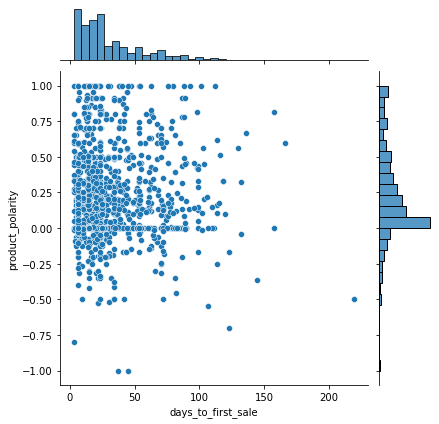

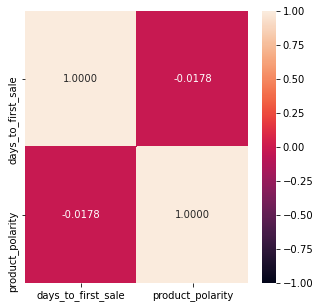

In [55]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = pl, x="days_to_first_sale", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(pl[["days_to_first_sale", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

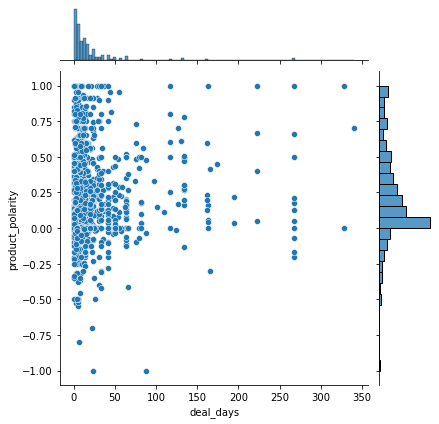

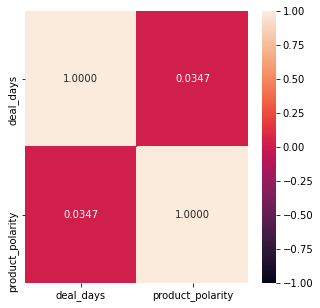

In [56]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = pl, x="deal_days", y="product_polarity")

fig = plt.figure(figsize = (5,5))
sb.heatmap(pl[["deal_days", "product_polarity"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:xlabel='product_polarity', ylabel='business_segment'>

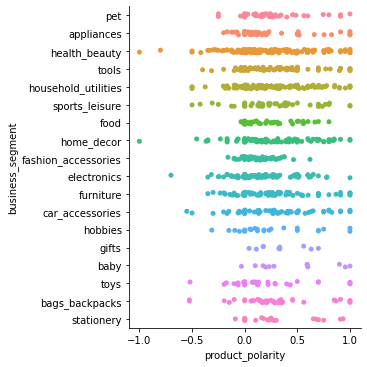

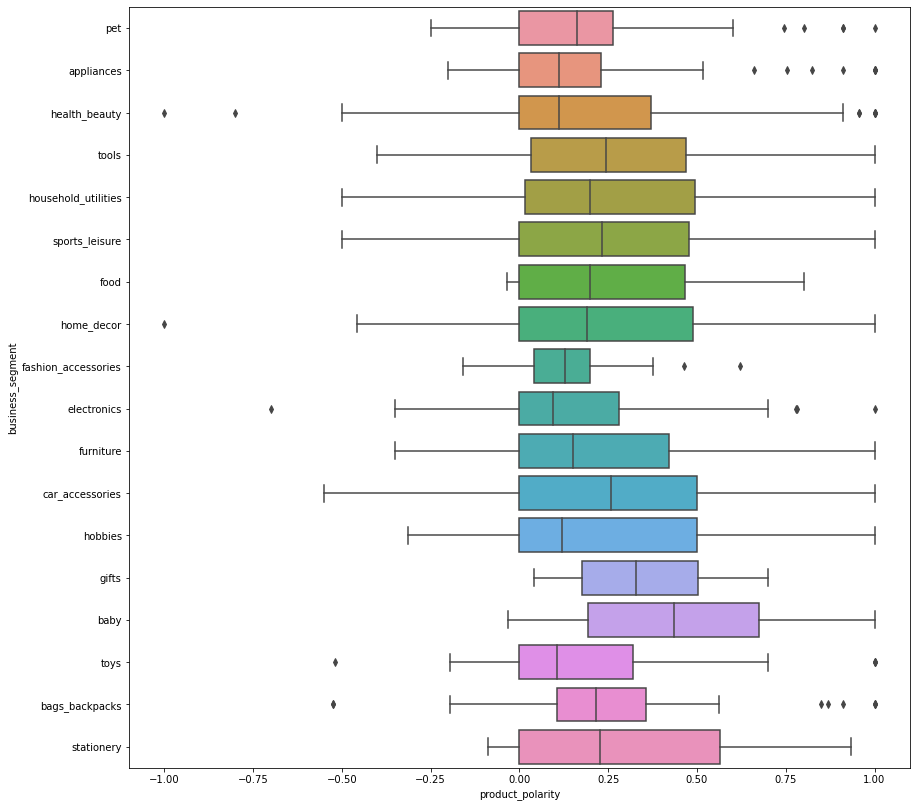

In [57]:
sb.catplot(data = pl, x="product_polarity", y="business_segment")

fig = plt.figure(figsize = (14,14))
sb.boxplot(x = "product_polarity", y= "business_segment", data = pl)

<AxesSubplot:xlabel='product_polarity', ylabel='lead_type'>

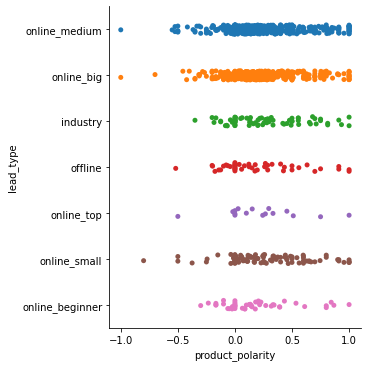

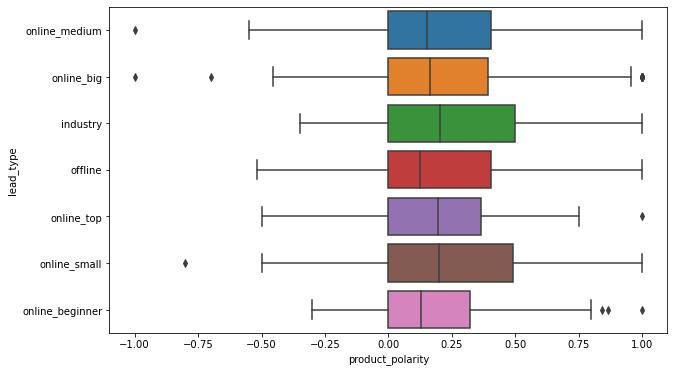

In [58]:
sb.catplot(data = pl, x="product_polarity", y="lead_type")

fig = plt.figure(figsize = (10,6))
sb.boxplot(x = "product_polarity", y= "lead_type", data = pl)

<AxesSubplot:xlabel='product_polarity', ylabel='lead_behaviour_profile'>

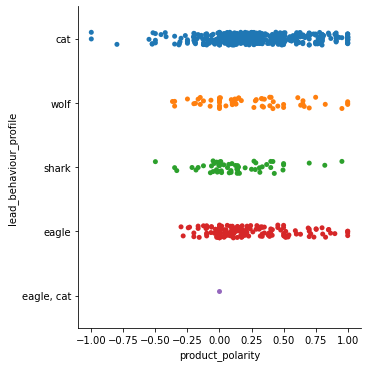

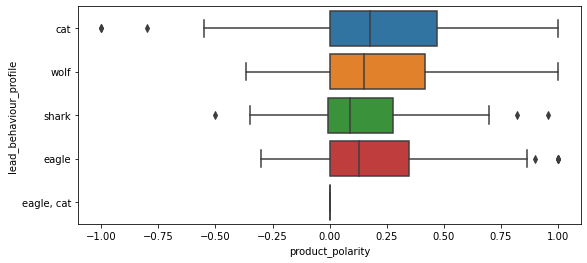

In [59]:
sb.catplot(data = pl, x="product_polarity", y="lead_behaviour_profile")

fig = plt.figure(figsize = (9,4))
sb.boxplot(x = "product_polarity", y= "lead_behaviour_profile", data = pl)

<AxesSubplot:xlabel='product_polarity', ylabel='business_type'>

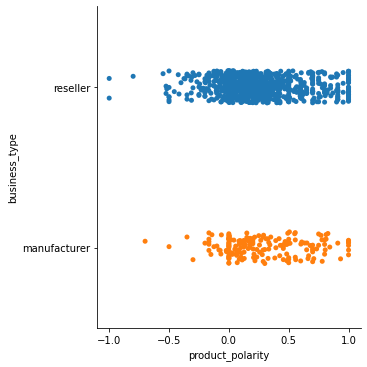

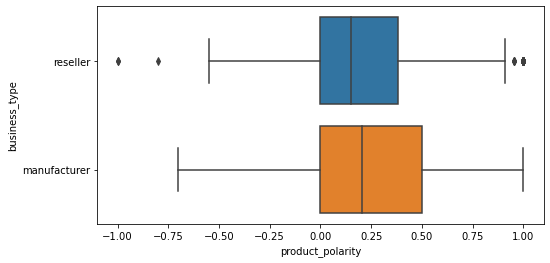

In [60]:
sb.catplot(data = pl, x="product_polarity", y="business_type")

fig = plt.figure(figsize = (8,4))
sb.boxplot(x = "product_polarity", y= "business_type", data = pl)